# Studies using bb0nu data

In [178]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
from IPython.display import Image 
from IPython.display import Math
from IPython.display import Latex

In [180]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed Feb  5 17:51:39 2020


In [181]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import tables            as tb
import random
import glob
import warnings
#sns.set()

In [182]:
from pynext.system_of_units import *

In [183]:
from pynext.pynext_types import TpcEL
from pynext.pynext_types import TpcXe
from pynext.pynext_types import Cylinder, Sphere, Ray
from pynext.pynext_types import FiberWLS
from pynext.pynext_types import WLS
from pynext.pynext_types import SiPM
from pynext.pynext_types import FiberDetector

In [184]:
from pynext.graphics import draw_cylinder
from pynext.pynext_plot import  display_figure
from pynext.pynext_plot import  display_figures

In [185]:
from pynext.histograms import  h1, h1d

In [210]:
from pynext.pynext_trk import  read_df
from pynext.pynext_trk import  track_length_in_z
from pynext.pynext_trk import  track_length_in_steps
from pynext.pynext_trk import  track_length_in_z_event_interval
from pynext.pynext_trk import  track_length_in_steps_event_interval
from pynext.pynext_trk import  rebin_df_in_z
from pynext.pynext_trk import  emax_in_event_interval
from pynext.pynext_trk import  energy_in_event_interval

# Reading bb0nu data

In [187]:
path = '/Users/jjgomezcadenas/Projects/Development/databb0nu/'
file = 'NextTon.15atm.bb0nu.0_0_100.df.h5'

In [188]:
df = read_df(path, file)
df.head()

label      time         x         y           z  \
event_id particle_id hit_id                                                     
0        2           0       ACTIVE  0.003395 -0.546290  0.808249   99.846649   
                     1       ACTIVE  0.006800 -0.975028  1.638953  100.174286   
                     2       ACTIVE  0.010229 -1.141906  2.504077  100.641304   
                     3       ACTIVE  0.013665 -1.152955  3.347937  101.175766   
                     4       ACTIVE  0.017078 -1.147807  4.001503  101.922150   

                                    E  
event_id particle_id hit_id            
0        2           0       0.007756  
                     1       0.005547  
                     2       0.005672  
                     3       0.007301  
                     4       0.004648

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3361217 entries, (0, 2, 0) to (9668, 4, 27)
Data columns (total 6 columns):
label    object
time     float32
x        float32
y        float32
z        float32
E        float32
dtypes: float32(5), object(1)
memory usage: 109.1+ MB


In [191]:
track_length_in_z(df, event_id=2)

185.86136

In [192]:
track_length_in_steps(df, event_id=2)

336

In [193]:
TRKZ = track_length_in_z_event_interval(df, id_max=1000)

In [194]:
TRKL = track_length_in_steps_event_interval(df, id_max=9000)

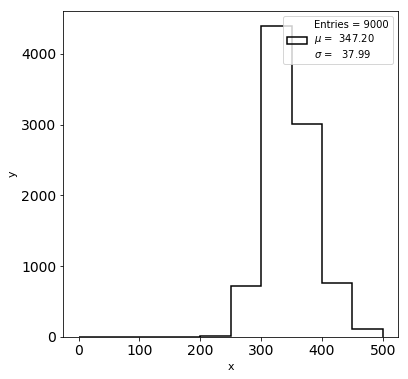

In [195]:
n, b, mu, std = h1d(TRKL, bins=10, range=(0,500))

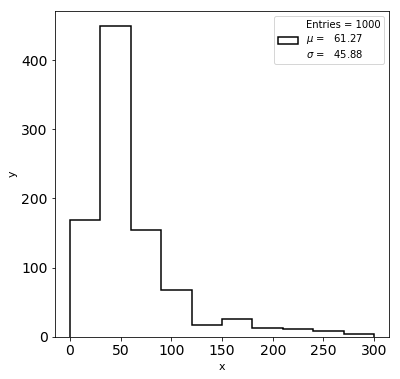

In [196]:
n, b, mu, std = h1d(TRKZ, bins=10, range=(0,300))

### Rebinning 

- Steps correspond to 0.3 mm. We are interested in steps of 1 mm (~1 mus).
- Need to rebin in about 25 bins. 

In [205]:
rdf = rebin_df_in_z(df,event_id=0, nbins=25)

In [206]:
rdf

,time,x,y,z,E
z,,,,,
"(98.481, 99.493]",8.593654,-1319.514526,134.227417,1683.963135,0.141578
"(99.493, 100.505]",6.035481,-916.532227,65.294304,2100.330811,0.210218
"(100.505, 101.516]",28.272791,-3966.322998,289.933258,5754.645508,0.355872
"(101.516, 102.528]",1.631673,-214.189545,27.542107,509.655975,0.054497
"(102.528, 103.54]",2.955606,-457.350189,73.764595,924.946533,0.066898
"(103.54, 104.551]",1.286319,-181.994431,37.868847,623.351013,0.038841
"(104.551, 105.563]",0.911638,-107.243370,14.528696,525.398804,0.033587
"(105.563, 106.575]",0.890329,-113.890709,28.284813,531.031860,0.042313
"(106.575, 107.587]",0.522138,-54.670853,21.192162,428.901550,0.043323


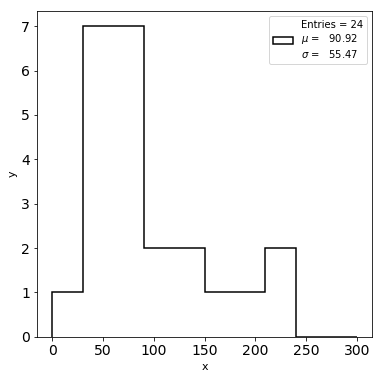

In [207]:
n, b, mu, std = h1d(rdf.E/keV, bins=10, range=(0,300))

In [208]:
rdf1 = rebin_df_in_z(df, event_id=3)

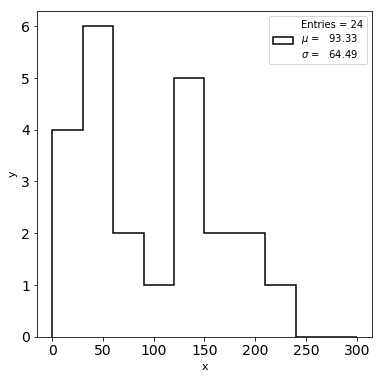

In [209]:
n, b, mu, std = h1d(rdf1.E/keV, bins=10, range=(0,300))

In [211]:
E = energy_in_event_interval(df, id_min=0, id_max=1000, nbins=25)

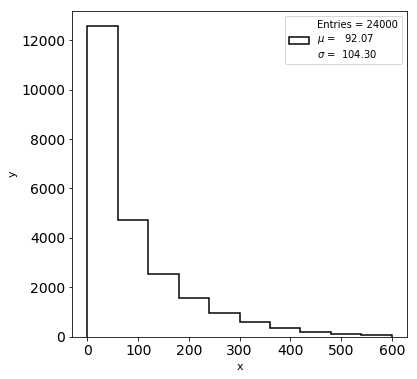

In [212]:
n, b, mu, std = h1d(E, bins=10, range=(0,600))

In [213]:
EMX = emax_in_event_interval(df, id_min=0, id_max=1000, nbins=25)

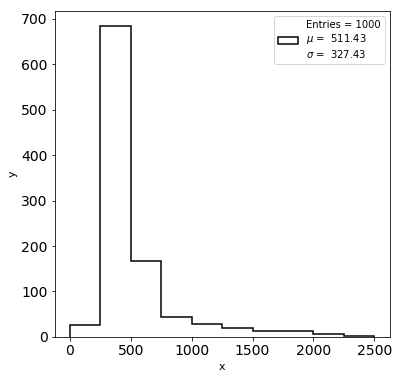

In [214]:
n, b, mu, std = h1d(EMX, bins=10, range=(0,2500))

In [215]:
emx_mu = mu
emx_std = std
emx = mu + 3 * std
print(f'max energy = {emx:.2f}')

max energy = 1493.71


# NEXT-HD

In [216]:
tpcel = TpcEL(EP = 1.1 * kilovolt / (cm * bar),
               dV = 0.5 * kilovolt / cm,
               P  =  15 * bar,
               d  =  10 * mm,
               L  = 125 * cm)
tpcel


        E/P =    1.10 kV * cm^-1* bar^-1
        dV = drift voltage =    0.50 kV * cm^-1
        P  = pressure =   15.00 bar
        d  = EL grid gap =   10.00 mm
        L  = drift lenght =   1.25 m
        Grid voltage =   16.50 kV
        Cathode voltage =   79.00 kV
        Yield =  5.70e+02 photons/e

    
        Primary scintillation photons per MeV = 2.55e+04
        Primary ionization electrons per MeV = 4.57e+04
        EL photons per MeV                   = 2.60e+07
        
        Primary scintillation Krypton = 1.06e+03
        Primary ionization electrons Krypton = 1.89e+03
        EL photons Krypton                   = 1.08e+06
        
        Primary scintillation Qbb = 6.27e+04
        Primary ionization electrons Qbb = 1.12e+05
        EL photons Qbb                   = 6.40e+07
        

In [217]:
r    = 125 * cm
zmin = -125 * cm
zmax = 125 * cm
chd =Cylinder(r, zmin, zmax)
chd

Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)

In [218]:
hdxe = TpcXe(chd)
hdxe


        material       = Xenon
        density (rho)  =    0.09 g/cm3
        mass           = 1103.24  kg
        Cylinder       = Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)
    

In [219]:
tpb = WLS(name='TPB', qeff=0.65)
tpb

WLS(name='TPB', qeff=0.65)

In [220]:
fwls = FiberWLS(d = 2*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)
fwls


        diameter =2.0 mm, Q = 0.85, PTFE refl = 0.98
        ncore = 1.6, nclad1 =1.49, nclad2 =1.42
        Absoprtion prob at 450 nm     = 0.8906170225195483
        Trapping efficieny            = 0.09837038590604039
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [221]:
s13360 = SiPM(name='s13360', xsize=2*mm, PDE = 0.4, C = 150*pF, Rs=100*ohm)
s13360


        sensor =s13360, size = 2.0 mm, PDE = 0.4
        capacitance = 150.00 pF;
        

In [228]:
fhd = FiberDetector(tpcel, hdxe, fwls, s13360, eff_t=0.80, sampling= 100 * ns, adcPerPes=15, tempC=-25)
fhd


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      = 1103.24  kg

        Dimensions(Cylinder)  = Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)

        Fibers efficiency = 3.58 %
        of which: Transport = 0.051152600671141 % & attenuation = 0.6996725373751304 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 3927

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.08e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 6.40e+07

        Primary scintillation Krypton detected = 1.52e+01
        EL photons Krypton detected            = 1.55e+04
        Primary scintillation Qbb detected     = 8.98e+02
        EL photons Qbb detected                = 9.16e+05

        Prima

In [229]:
print(f'EL photons per MeV ={fhd.tpcel.el_photons(1*MeV):.2e}')

EL photons per MeV =2.60e+07


In [233]:
max_energy_deposit_mus  = 1500 * keV
mean_energy_deposit_mus = 500 * keV
ng_max_energy_deposit_mus = fdHD.tpcel.el_photons(max_energy_deposit_mus)
print(f'EL photons max energy deposit (per mus) ={ng_max_energy_deposit_mus:.2e}')
ng_mean_energy_deposit_mus = fdHD.tpcel.el_photons(mean_energy_deposit_mus)
print(f'EL photons max energy deposit (per mus) ={ng_mean_energy_deposit_mus:.2e}')

EL photons max energy deposit (per mus) =3.90e+07
EL photons max energy deposit (per mus) =1.30e+07


In [237]:
nphe_max_energy_deposit_mus = ng_max_energy_deposit_mus * fhd.efficiency * fhd.sipm.PDE 
nphe_mean_energy_deposit_mus = ng_mean_energy_deposit_mus * fhd.efficiency * fhd.sipm.PDE 
print(f'Number of PE max energy deposit in full detector (mus) = {nphe_max_energy_deposit_mus:.2e}')
print(f'Number of PE mean energy deposit in full detector (mus) = {nphe_mean_energy_deposit_mus:.2e}')

Number of PE max energy deposit in full detector (mus) = 5.59e+05
Number of PE mean energy deposit in full detector (mus) = 1.86e+05


In [238]:
nphe_max_energy_deposit_mus_fb  = nphe_max_energy_deposit_mus / fhd.n_fibers  
nphe_mean_energy_deposit_mus_fb = nphe_mean_energy_deposit_mus / fhd.n_fibers 
print(f'Number of PE max energy deposit per fiber (mus) = {nphe_max_energy_deposit_mus_fb:.2e}')
print(f'Number of PE mean energy deposit per fiber (mus) = {nphe_mean_energy_deposit_mus_fb:.2e}')

Number of PE max energy deposit per fiber (mus) = 1.42e+02
Number of PE mean energy deposit per fiber (mus) = 4.74e+01


In [240]:
pe_to_adc = 15

In [239]:
def n_bits(npe):
    return int(np.log(npe -2)) + 1

In [241]:
nbits_max_energy_deposit_mus_fb  = n_bits(nphe_max_energy_deposit_mus_fb * pe_to_adc)  
nbits_mean_energy_deposit_mus_fb = n_bits(nphe_mean_energy_deposit_mus_fb * pe_to_adc) 
print(f'Number of bits max energy deposit per fiber (mus) = {nbits_max_energy_deposit_mus_fb:.2e}')
print(f'Number of bits mean energy deposit per fiber (mus) = {nbits_mean_energy_deposit_mus_fb:.2e}')

Number of bits max energy deposit per fiber (mus) = 8.00e+00
Number of bits mean energy deposit per fiber (mus) = 7.00e+00


In [258]:
nfg = 10 # number of fibers to gang
print(f'GFiber (number of ganged fibers) ={nfg}')

GFiber (number of ganged fibers) =10


In [259]:
nbits_max_energy_deposit_mus_nfg  = n_bits(nphe_max_energy_deposit_mus_fb * pe_to_adc * nfg)  
nbits_mean_energy_deposit_mus_nfg = n_bits(nphe_mean_energy_deposit_mus_fb * pe_to_adc * nfg) 
print(f'Number of bits max energy deposit per GFiber (mus) = {nbits_max_energy_deposit_mus_nfg:.2e}')
print(f'Number of bits mean energy deposit per GFiber (mus) = {nbits_mean_energy_deposit_mus_nfg:.2e}')

Number of bits max energy deposit per GFiber (mus) = 1.00e+01
Number of bits mean energy deposit per GFiber (mus) = 9.00e+00
